In [1]:
import numpy as np
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from tqdm import tqdm

In [2]:
print(plt.rcParams['font.family'])
plt.rcParams["figure.figsize"] = (14,14)

['sans-serif']


In [3]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rc
 
## 폰트 경로
font_path = "C:\\Users\\sanghyun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicLight.ttf"
 
#폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()
 
#font 설정
plt.rc('font',family=font_name)

In [4]:
def unit_stats(x, unit_list):
    df = {}
    
    df['edu'] = x.iloc[0]['education']
    df['age'] = x.iloc[0]['age']
    df['duration'] = x.iloc[0]['duration_date']
    df['organization'] = x.iloc[0]['organization']
        
    for unit in unit_list:
        label_time = 'unit' + str(unit) + '_time'
        label_score = 'unit' + str(unit) + '_score'
        label_level = 'unit' + str(unit) + '_level'
        label_ratio = 'unit' + str(unit) + '_ratio'
        label_count = 'unit' + str(unit) + '_count'
                
        df[label_count] = x[x['unit'] == unit]['user_idx'].count()
        df[label_time] = x[x['unit'] == unit]['game_log_time'].values
        df[label_score] = x[x['unit'] == unit]['game_log_success'].values
        df[label_level] = x[x['unit'] == unit]['game_log_level'].values
        
    return pd.Series(df)

In [5]:
game_log = pd.read_excel("../game_log.xlsx", index_col='game_log_idx')
# label = pd.read_csv("label2.csv", encoding='utf-8-sig')
# game_log = pd.merge(game_log, label)

In [6]:
game_log

,log_create_time,game_log_level,game_log_success,gender,education,height,name,organization,unit,id_create_time,unit_title,user_idx,game_log_time,age,duration_date
game_log_idx,,,,,,,,,,,,,,,
13511,2021-09-27 11:51:06,1,94.12,F,7,149,김욱문,MEET-인하대,5,2021-09-23 14:50:15,동그라미 순서대로 누르기,226,3.005882,80,243
13512,2021-09-27 11:51:20,1,84.21,F,0,173,김귀녀,MEET-인하대,5,2021-09-23 14:57:32,동그라미 순서대로 누르기,228,1.621053,73,243
13513,2021-09-27 11:51:41,1,87.50,F,9,152,구창숙,MEET-인하대,5,2021-09-23 14:40:23,동그라미 순서대로 누르기,225,3.512500,77,243
13514,2021-09-27 11:53:06,1,93.75,M,6,161,신정균,MEET-인하대,5,2021-09-23 14:54:37,동그라미 순서대로 누르기,227,3.693750,74,243
13516,2021-09-27 11:54:20,1,100.00,F,7,149,김욱문,MEET-인하대,3,2021-09-23 14:50:15,짝맞추기,226,12.566667,80,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87123,2022-05-24 14:56:11,8,75.00,F,9,148,김부미자,MEET-노인보건센터,9,2021-12-06 13:32:04,방금 전 카드 기억하기,892,2.350000,79,169
87125,2022-05-24 14:59:19,1,80.00,F,9,148,김부미자,MEET-노인보건센터,14,2021-12-06 13:32:04,다른 그림 찾기,892,8.633333,79,169
87127,2022-05-24 15:00:08,1,78.57,F,6,155,조금자,MEET-노인보건센터,20,2021-12-06 14:42:02,얼마일까요,893,10.728571,66,169


In [11]:
unit_log = game_log.groupby('user_idx').apply(unit_stats, range(2,23))

In [12]:
unit_log

,edu,age,duration,organization,unit2_count,unit2_time,unit2_score,unit2_level,unit3_count,unit3_time,...,unit20_score,unit20_level,unit21_count,unit21_time,unit21_score,unit21_level,unit22_count,unit22_time,unit22_score,unit22_level
user_idx,,,,,,,,,,,,,,,,,,,,,
225,9,77,243,MEET-인하대,16,"[22.82857142857143, 40.34999999999999, 31.02, ...","[100.0, 75.0, 100.0, 75.0, 100.0, 100.0, 85.71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",14,"[12.81666666666666, 11.65384615384615, 11.7461...",...,"[90.48, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]","[1, 1, 1, 1, 1, 1, 1]",0,[],[],[],14,"[5.625, 5.899999999999999, 3.441176470588236, ...","[95.83, 95.65, 100.0, 83.33, 80.95, 90.91, 100...","[1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2]"
226,7,80,243,MEET-인하대,41,"[26.21666666666667, 27.66, 42.43333333333334, ...","[83.33, 100.0, 100.0, 100.0, 100.0, 50.0, 100....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",28,"[12.56666666666666, 13.11666666666667, 10.5571...",...,"[85.71, 84.62, 76.92, 95.0, 66.67, 76.47, 88.2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0,[],[],[],50,"[6.056521739130434, 4.244827586206896, 5.97391...","[65.22, 62.07, 47.83, 92.31, 14.29, 60.71, 63....","[1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, ..."
227,6,74,243,MEET-인하대,16,"[53.96666666666666, 39.55, 140.7, 43.475, 102....","[100.0, 75.0, 0.0, 0.0, 0.0, 66.67, 100.0, 100...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",14,"[15.32, 15.5, 8.447058823529414, 15.39, 14.409...",...,"[95.45, 91.67, 94.44, 100.0, 95.83]","[1, 1, 1, 1, 1]",0,[],[],[],11,"[3.967741935483871, 8.523529411764706, 3.72812...","[64.52, 58.82, 78.13, 41.67, 72.22, 46.43, 48....","[1, 2, 1, 2, 1, 2, 2, 2, 3, 2, 3]"
228,0,73,243,MEET-인하대,17,"[56.35, 52.73333333333333, 47.20000000000001, ...","[100.0, 100.0, 66.67, 100.0, 50.0, 100.0, 0.0,...","[1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...",14,"[14.16363636363636, 14.46363636363636, 12.6, 2...",...,"[70.0, 66.67, 36.36, 36.36, 54.55, 66.67, 37.5...","[1, 1, 1, 1, 1, 1, 1, 1]",0,[],[],[],19,"[3.563636363636363, 6.25909090909091, 3.505882...","[72.73, 22.73, 47.06, 40.63, 48.48, 44.12, 86....","[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, ..."
537,10,77,216,MEET-아주대신경과,5,"[32.66, 22.68571428571429, 21.4, 21.4375, 30.44]","[100.0, 85.71, 100.0, 87.5, 40.0]","[1, 1, 1, 1, 1]",3,"[13.28333333333333, 13.175, 9.493749999999999]",...,"[90.91, 83.33]","[1, 1]",0,[],[],[],5,"[1.749019607843137, 3.618181818181818, 4.21666...","[72.55, 69.7, 83.33, 86.67, 64.29]","[1, 2, 3, 4, 5]"
541,6,78,216,MEET-아주대신경과,8,"[37.96666666666667, 88.85000000000001, 74.4, 8...","[33.33, 0.0, 50.0, 100.0, 100.0, 25.0, 100.0, ...","[1, 1, 1, 1, 1, 1, 1, 1]",6,"[33.64, 15.15, 16.8, 15.56, 18.0, 9.7133333333...",...,"[100.0, 93.75, 95.83, 100.0, 94.74, 94.12, 85....","[1, 1, 1, 1, 1, 1, 1, 1]",0,[],[],[],8,"[8.841176470588234, 4.103333333333333, 14.4545...","[94.12, 40.0, 36.36, 0.0, 96.15, 78.57, 89.47,...","[1, 1, 1, 1, 1, 2, 2, 2]"
566,12,73,215,MEET-전남대,287,"[11.65714285714286, 16.8, 41.95, 39.5, 22.7857...","[100.0, 100.0, 75.0, 100.0, 100.0, 100.0, 80.0...","[1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",24,"[9.953333333333335, 12.00769230769231, 11.5076...",...,"[100.0, 100.0, 75.0, 100.0, 96.0, 91.3, 96.43,...","[1, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, ...",0,[],[],[],28,"[1.592592592592593, 2.755, 4.475000000000001, ...","[100.0, 92.5, 100.0, 92.86, 92.59, 95.45, 85.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9, ..."
567,16,74,215,MEET-전남대,32,"[17.62222222222222, 16.375, 16.18, 16.22, 39.8...","[55.56, 50.0, 80.0, 100.0, 50.0, 100.0, 77.78,...","[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...",20,"[13.67272727272727, 12.29166666666667, 9.0625,...",...,"[81.48, 96.77, 100.0, 91.3, 94.74, 96.15, 96.3...","[1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3]",0,[],[],[],31,"[2.488095238095238, 4.19, 3.977419354838711, 3...","[61.9, 16.67, 6.45, 74.19, 62.96, 72.73, 86.36...","[1, 2, 2, 2, 3, 4, 5, 6, 7, 7, 8, 9, 8, 9, 9, ..."
568,16,79,215,MEET-전남대,30,

5


C:\Users\sanghyun\AppData\Local\Temp\ipykernel_10880\2273084503.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_log_100[label + 'index'][idx] = val[label + 'score'] * (1 + val[label + 'level']/10) * (8/val[label + 'time'])


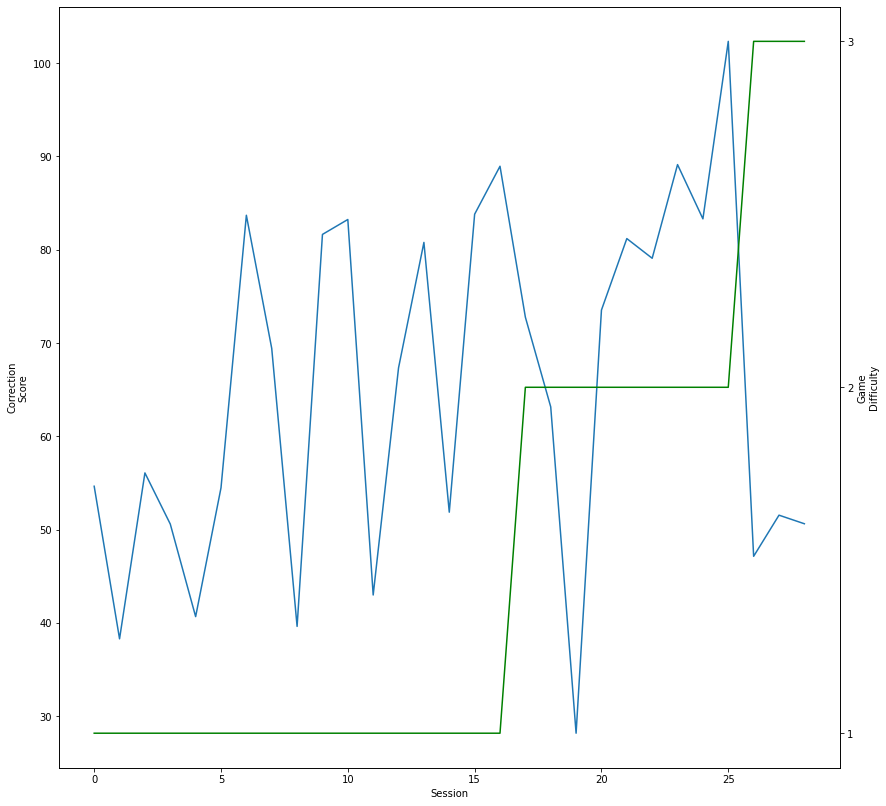

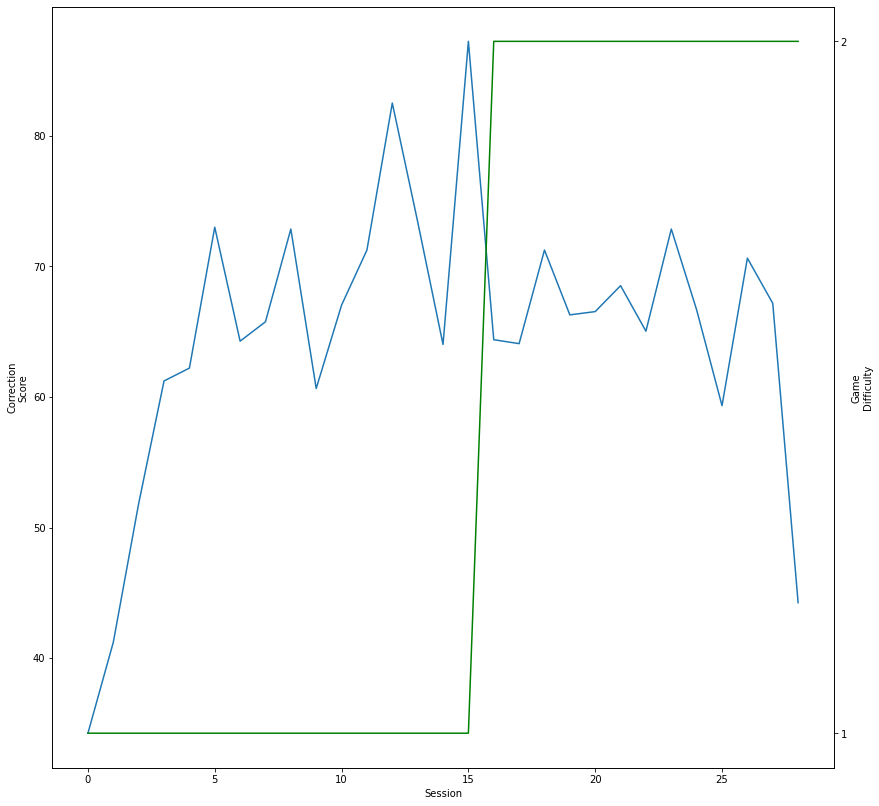

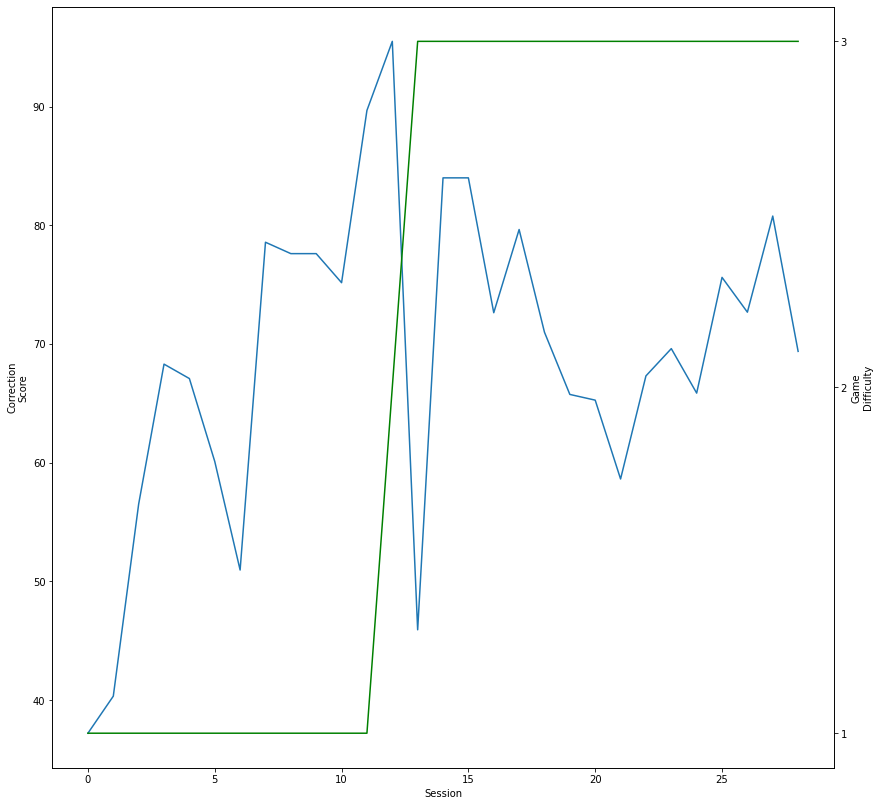

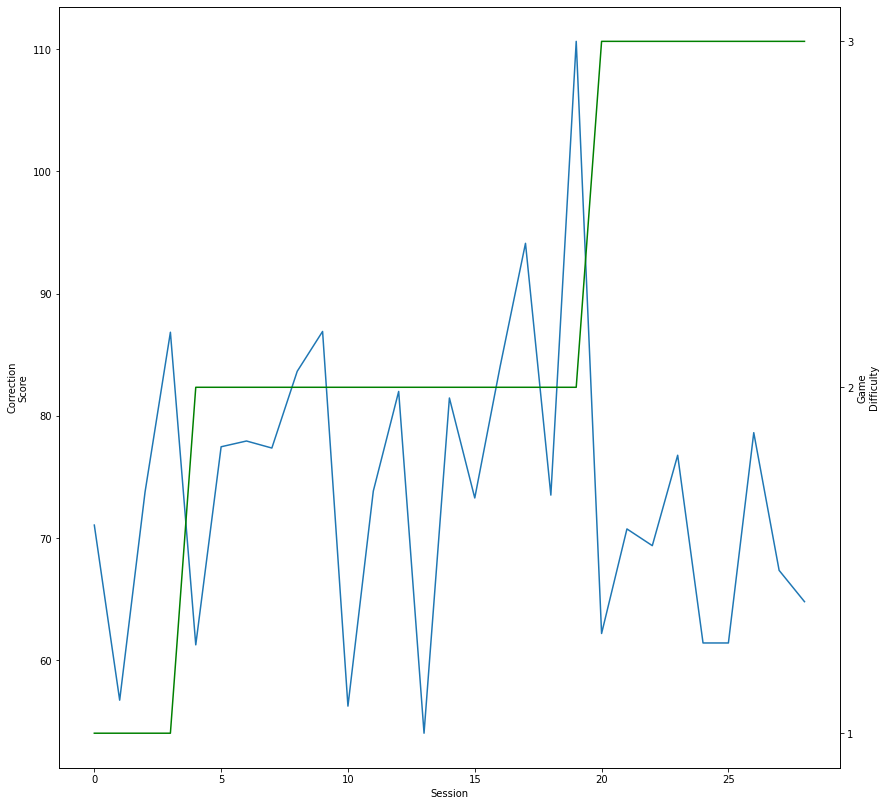

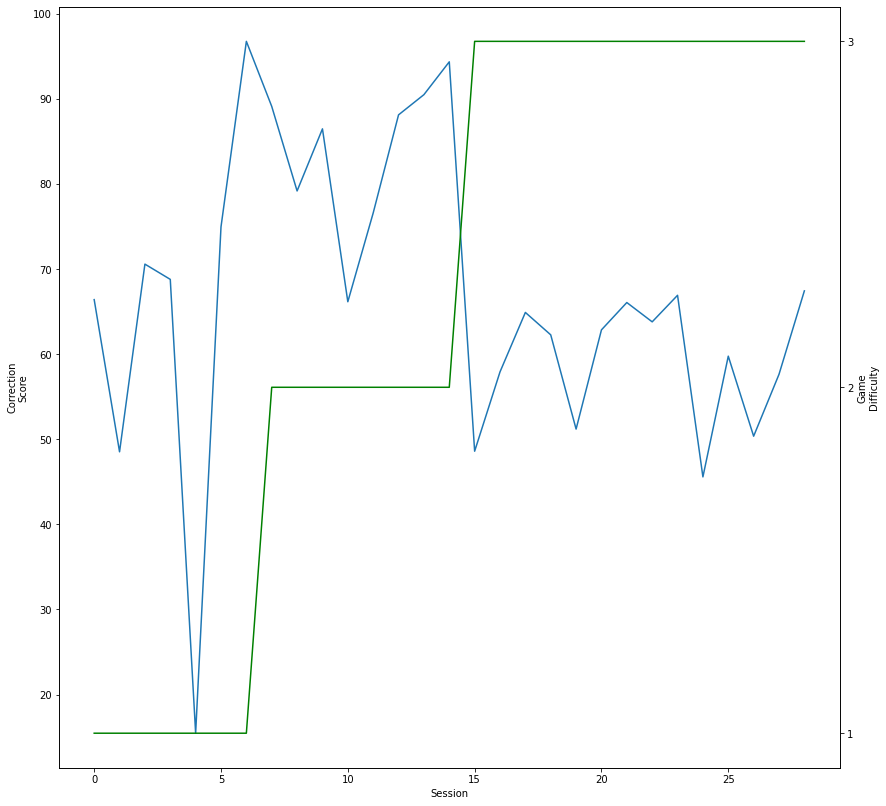

In [17]:
label = 'unit3_'
n = 29

unit_log_100 = unit_log[unit_log[label + 'count']>n]
# unit_log_100 = unit_log_100.drop(unit_log_100[unit_log_100['organization'].str.contains('복지관')].index)
# unit_log_100 = unit_log_100.drop(unit_log_100[unit_log_100['organization'].str.contains('로아')].index)
unit_log_100 = unit_log_100.loc[unit_log_100[unit_log_100['organization'].str.contains('MEET')].index]
print(len(unit_log_100))

unit_log_100[label + 'index'] = ''

for idx, val in unit_log_100.iterrows():
    unit_log_100[label + 'index'][idx] = val[label + 'score'] * (1 + val[label + 'level']/10) * (8/val[label + 'time'])

correction_score = [val[:n] for idx, val in unit_log_100[label + 'index'].iteritems()]
difficulty = [val[:n] for idx, val in unit_log_100[label + 'level'].iteritems()]

for i in range(len(unit_log_100)):
    # sns.lineplot(x=range(n), y=np.array(np.mean(temp[:], axis=0)))
    fig, ax1 = plt.subplots()
    sns.lineplot(x=range(n), y=np.array(correction_score[i]), ax=ax1)
    plt.ylabel("Correction\nScore")
    plt.xlabel("Session")

    ax2 = plt.twinx()
    sns.lineplot(x=range(n), y=np.array(difficulty[i]), color='g', ax=ax2)
    plt.ylabel("Game\nDifficulty")
    plt.yticks(np.arange(1, np.max(difficulty[i]+1), step=1))

In [18]:
unit_log_100

,edu,age,duration,organization,unit2_count,unit2_time,unit2_score,unit2_level,unit3_count,unit3_time,...,unit20_level,unit21_count,unit21_time,unit21_score,unit21_level,unit22_count,unit22_time,unit22_score,unit22_level,unit3_index
user_idx,,,,,,,,,,,,,,,,,,,,,
694,6,80,207,MEET-이대서울,27,"[44.96666666666667, 31.76, 27.36666666666667, ...","[100.0, 80.0, 66.67, 0.0, 100.0, 50.0, 50.0, 7...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,"[16.1, 22.97142857142857, 15.69, 17.3888888888...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0,[],[],[],32,"[6.861904761904761, 2.402325581395349, 2.30454...","[42.86, 53.49, 65.91, 46.15, 46.15, 90.24, 82....","[1, 1, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 3, 3, ...","[54.6583850931677, 38.30845771144279, 56.08667..."
696,16,77,207,MEET-이대서울,67,"[58.8, 39.2, 30.34, 38.6, 45.79999999999999, 3...","[100.0, 75.0, 100.0, 0.0, 0.0, 75.0, 100.0, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",44,"[25.7, 21.35714285714286, 16.97777777777778, 1...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0,[],[],[],148,"[2.027272727272727, 2.027272727272727, 1.16612...","[33.33, 33.33, 22.58, 11.54, 20.0, 23.53, 26.6...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[34.24124513618678, 41.204013377926415, 51.832..."
893,6,66,169,MEET-노인보건센터,95,"[32.34, 34.56, 26.03333333333333, 31.86, 26.2,...","[40.0, 100.0, 83.33, 100.0, 100.0, 75.0, 83.33...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",67,"[23.64285714285714, 21.81428571428571, 15.57, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,[],[],[],97,"[5.579166666666667, 3.871875000000001, 4.44137...","[33.33, 53.13, 55.17, 26.47, 38.89, 44.12, 44....","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[37.22054380664654, 40.34053700065489, 56.5189..."
958,6,82,145,MEET-인하대,22,"[56.6, 27.8, 23.84285714285714, 43.1, 23.01428...","[100.0, 100.0, 100.0, 33.33, 85.71, 66.67, 100...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",44,"[12.38333333333333, 15.51, 11.93076923076923, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0,[],[],[],38,"[3.571875, 3.25, 2.369767441860465, 2.36976744...","[59.38, 58.33, 55.81, 55.81, 72.09, 37.5, 74.3...","[1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 3, 4, 4, 4, 4, ...","[71.06325706594889, 56.73758865248228, 73.7588..."
1009,6,74,109,MEET-이대서울,12,"[40.90000000000001, 23.0, 48.8, 42.425, 16.55,...","[25.0, 100.0, 100.0, 100.0, 90.0, 0.0, 100.0, ...","[1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1]",39,"[13.25, 18.13333333333333, 12.46666666666667, ...",...,"[1, 1, 1]",0,[],[],[],112,"[3.541176470588236, 2.665853658536585, 2.24888...","[41.18, 43.9, 53.33, 53.33, 58.54, 58.97, 67.5...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[66.41509433962264, 48.5294117647059, 70.58823..."
